# Exercise 1: Exploratory Data Analysis

In [1]:
using Pkg

In [ ]:
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("StatsBase")
Pkg.add("Statistics")
Pkg.add("Plots")
Pkg.add("GLM")
Pkg.add("MLDataUtils")

In [2]:
using Statistics
using StatsBase
using Plots
using CSV
using DataFrames
using GLM
using MLDataUtils

In [3]:
df = CSV.File("../dat/bottle.csv") |> DataFrame

864863×74 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Sta_ID       Depth_ID                           De ⋯
        │ Int64    Int64    String15     String                             In ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      2 │       1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      3 │       1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      4 │       1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      5 │       1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
      6 │       1        6  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      7 │       1        7  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      8 │       1        8  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
      9 │       1        9  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…     ⋯
     10 │       1       10  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
     11 │       1       11  054.0 056.0  19-4903CR-HY-060-0930-05400560-0…
   ⋮    │    ⋮        ⋮          ⋮                       ⋮                     ⋱
 864854 │   34403   864854  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864855 │   34403   864855  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…     ⋯
 864856 │   34403   864856  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864857 │   34403   864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864858 │   34403   864858  093.3 120.0  20-1611SR-MX-313-2053-09331200-0…
 864859 │   34404   864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…     ⋯
 864860 │   34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864861 │   34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864862 │   34404   864862  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…
 864863 │   34404   864863  093.4 026.4  20-1611SR-MX-310-2239-09340264-0…     ⋯
                                              70 columns and 864842 rows omitted

## dataShape: to get shape of the data

In [4]:
#gives the no of rows and cols in the dataframe
function dataShape(dataframe)
    println("Dataframe shape| Rows: ",nrow(dataframe)," Columns: ",ncol(dataframe))
end

dataShape (generic function with 1 method)

In [5]:
dataShape(df)

Dataframe shape| Rows: 864863 Columns: 74


## dataType: gives data type of each column in the dataset

In [6]:
#gives data type of each column in the dataset
function dataType(dataframe)
    for col in names(dataframe)
         col_type=eltype(dataframe[!, col])
        println(col_type)
    end
end 

dataType (generic function with 1 method)

In [7]:
dataType(df)

Int64
Int64
String15
String
Int64
Union{Missing, Float64}
Union{Missing, Float64}
Union{Missing, Float64}
Union{Missing, Float64}
Union{Missing, Float64}
Union{Missing, Float64}
Union{Missing, Int64}
Int64
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, Float64}
Union{Missing, Int64}
Union{Missing, Int64}
Union{Missing, String31}

## count_missing(col) : counts number of missing data in a given col (Column).

In [8]:
#counts number of missing data in a given col (Column).
#column is String
function count_missing(dataframe,column)
   missing_count= count(x -> ismissing(x), dataframe[!, column])
    return missing_count
end

count_missing (generic function with 1 method)

In [11]:
println("Missing values in column is: ",count_missing(df,"O2ml_L"))

Missing values in column is: 168662


## dataMissingPercentage(): finds missing percentage of each column.

In [9]:
#finds missing percentage of each column
#column is String
function dataMissingPercentage(dataframe, column)
    missing_per=count_missing(dataframe, column)*100/nrow(dataframe)
    return missing_per
end

dataMissingPercentage (generic function with 1 method)

In [14]:
println("Missing percentage in column is: ",dataMissingPercentage(df,"O2ml_L"),"%")

Missing percentage in column is: 19.501585800294382%


## deleteColumns(threshold) : delete all the columns which have missing percent less than given threshold

In [10]:
#delete all the columns which have missing percent less than given threshold
#threshold is a number between 0-100 that represents the missing % that we can accept
function deleteColumns(dataframe,threshold)
    newdf=dataframe
    deleted_cols=0
    for col in names(newdf)
        dataMissingPercentage(dataframe, "$col")
        if dataMissingPercentage(dataframe, "$col") > threshold
            col_symbol = Symbol("$col")
               newdf = select(newdf,Not([col_symbol]))
            deleted_cols+=1
        end
            
    end
    println("$deleted_cols columns were deleted from df")
    return newdf
end

deleteColumns (generic function with 1 method)

In [1]:
df2=deleteColumns(df,5)

LoadError: UndefVarError: `deleteColumns` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

## calculateCorrelation() : creates correlation matrix between columns.

1. delete_nonnum_cols : Deletes non numeric columns
2. delete_IDCols : Deletse columns that cointain IDs
3. missing_rows_percentage: Calculates the percentage of rows that contain missing values
4. delete_incomplete_rows : drops the rows with missing values
5. delete_conscols : deletes rows that contain the same value across the rows or have really low variance
6. int_to_float : converts all rows to float64
7. calculateCorrelation : calculates the correlation matrix
8. ordered_corr_matrix : views the correlation matrix as a dataframe

resulting item
1. delete_nonnum_cols : df3
2. delete_IDCols : df3
3. missing_rows_percentage: no return
4. delete_incomplete_rows : df4
5. delete_conscols : df4
6. int_to_float : df4
7. calculateCorrelation : corr_matrix
8. ordered_corr_matrix : no return
Filtered dataframe: df4

In [41]:
function delete_nonnum_cols(dataframe)
    newdf=dataframe
    deleted_cols=0
    for col in names(newdf)
            col_values = newdf[!, col]
     if all(x -> isa(x, Union{Missing, Number}), col_values)==false  
            col_symbol = Symbol("$col")
               newdf = select(newdf,Not([col_symbol]))
            deleted_cols+=1
        end
    end
    println("$deleted_cols columns deleted from df for containing non numeric values")
    return newdf
end

delete_nonnum_cols (generic function with 1 method)

In [106]:
function delete_IDCols(dataframe)
    newdf=dataframe
    deleted_cols=0
    for col in names(newdf)
            col_values = newdf[!, col]
     if  all(x -> x == 1, diff(col_values))
            col_symbol = Symbol("$col")
               newdf = select(newdf,Not([col_symbol]))
            deleted_cols+=1
        end
    end
    println("$deleted_cols columns deleted from df for containing ID values")
    return newdf
end

delete_IDCols (generic function with 1 method)

In [110]:
function missing_rows_percentage(dataframe)
    missing_rows = count(row -> any(ismissing, row), eachrow(dataframe))
    missing_percentage = (missing_rows / nrow(dataframe)) * 100
    
    return missing_percentage
end

missing_rows_percentage (generic function with 1 method)

In [38]:
function delete_incomplete_rows(dataframe)
    newdf = dropmissing(dataframe)
    loss_percent=nrow(newdf)*100/nrow(dataframe)
    println("$loss_percent % of rows were saved after deleting the rows with missing values")
    return newdf
end

delete_incomplete_rows (generic function with 1 method)

In [43]:
function delete_conscols(dataframe)
    newdf=dataframe
        deleted_cols=0
    for col in names(newdf)
            col_values = newdf[!, col]
            variance = var(col_values) 
            unique_values = length(unique(col_values))  
         if variance < 1e-3 || unique_values <= 2
            col_symbol = Symbol("$col")
               newdf = select(newdf,Not([col_symbol]))
            deleted_cols+=1
        end
    end
    println("$deleted_cols columns deleted from df for containing constant values")
    return newdf
end

delete_conscols (generic function with 1 method)

In [34]:
function int_to_float(dataframe)
        newdf=dataframe
        converted_cols=0
    for col in names(newdf)    
        if all(x -> isa(x, Float64), newdf[!, col])==false 
            println("$col will be float64")
            newdf[!, col]=Float64.(newdf[!, col])
            converted_cols+=1         
        end 
    end
        println("$converted_cols columns were converted to float64")
        return newdf
end

int_to_float (generic function with 1 method)

In [35]:
function calculateCorrelation(dataframe)
    corr_matrix = cor(Matrix(dataframe))
end

calculateCorrelation (generic function with 1 method)

In [36]:
function ordered_corr_matrix(cmatrix)
    correlation_df = DataFrame(cmatrix, :auto)
end

ordered_corr_matrix (generic function with 1 method)

In [44]:
df3=delete_nonnum_cols(df2)
df3=delete_IDCols(df3)
df4=delete_incomplete_rows(df3)
df4=delete_conscols(df4)
df4=int_to_float(df4)

2 columns deleted from df for containing non numeric values


864863×13 DataFrame
    Row │ Cst_Cnt  Btl_Cnt  Depthm  T_degC    RecInd  T_prec  C14A1q  C14A2q   ⋯
        │ Int64    Int64    Int64   Float64?  Int64   Int64?  Int64?  Int64?   ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │       1        1       0    10.5         3       1       9       9   ⋯
      2 │       1        2       8    10.46        3       2       9       9
      3 │       1        3      10    10.46        7       2       9       9
      4 │       1        4      19    10.45        3       2       9       9
      5 │       1        5      20    10.45        7       2       9       9   ⋯
      6 │       1        6      30    10.45        7       2       9       9
      7 │       1        7      39    10.45        3       2       9       9
      8 │       1        8      50    10.24        7       2       9       9
      9 │       1        9      58    10.06        3       2       9       9   ⋯
     10 │       1       10      75     9.86        7       2       9       9
     11 │       1       11      78     9.83        3       2       9       9
   ⋮    │    ⋮        ⋮       ⋮        ⋮        ⋮       ⋮       ⋮       ⋮      ⋱
 864854 │   34403   864854     381     6.943       3       2       9       9
 864855 │   34403   864855     400     6.694       7       2       9       9   ⋯
 864856 │   34403   864856     440     6.312       3       2       9       9
 864857 │   34403   864857     500     5.993       7       2       9       9
 864858 │   34403   864858     521     5.818       3       2       9       9
 864859 │   34404   864859       0    18.744       7       2       9       9   ⋯
 864860 │   34404   864860       2    18.744       3       2       9       9
 864861 │   34404   864861       5    18.692       3       2       9       9
 864862 │   34404   864862      10    18.161       3       2       9       9
 864863 │   34404   864863      15    17.533       3       2       9       9   ⋯
                                               5 columns and 864842 rows omitted

In [49]:
corr_matrix=calculateCorrelation(df4)

8×8 Matrix{Float64}:
  1.0        -0.151658    0.06457    …  -0.151655    0.0645773  -0.151431
 -0.151658    1.0        -0.679687       1.0        -0.679688    0.999994
  0.06457    -0.679687    1.0           -0.679686    1.0        -0.678338
 -0.108142    0.0833913  -0.0704691      0.0833926  -0.0704695   0.0832519
  0.0731788   0.0178032  -0.0390897      0.017803   -0.0390904   0.0178316
 -0.151655    1.0        -0.679686   …   1.0        -0.679686    0.999994
  0.0645773  -0.679688    1.0           -0.679686    1.0        -0.678339
 -0.151431    0.999994   -0.678338       0.999994   -0.678339    1.0

In [50]:
ordered_corr_matrix(corr_matrix)

8×8 DataFrame
 Row │ x1          x2          x3          x4          x5          x6          ⋯
     │ Float64     Float64     Float64     Float64     Float64     Float64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  1.0        -0.151658    0.06457    -0.108142    0.0731788  -0.151655   ⋯
   2 │ -0.151658    1.0        -0.679687    0.0833913   0.0178032   1.0
   3 │  0.06457    -0.679687    1.0        -0.0704691  -0.0390897  -0.679686
   4 │ -0.108142    0.0833913  -0.0704691   1.0         0.0422053   0.0833926
   5 │  0.0731788   0.0178032  -0.0390897   0.0422053   1.0         0.017803   ⋯
   6 │ -0.151655    1.0        -0.679686    0.0833926   0.017803    1.0
   7 │  0.0645773  -0.679688    1.0        -0.0704695  -0.0390904  -0.679686
   8 │ -0.151431    0.999994   -0.678338    0.0832519   0.0178316   0.999994
                                                               2 columns omitted

## displayCorrelation() : dislpay correlation using heatmap.

In [66]:
function create_heatmap(dataframe, corr_matrix)
    column_names_map=names(dataframe)
    heatmap(corr_matrix, 
            xticks=(1:length(column_names_map),column_names_map),  # Set column names on x-axis
            yticks=(1:length(column_names_map),column_names_map),  # Set column names on y-axis
            color=:lightrainbow, 
            title="Correlation Matrix")
end

create_heatmap (generic function with 2 methods)

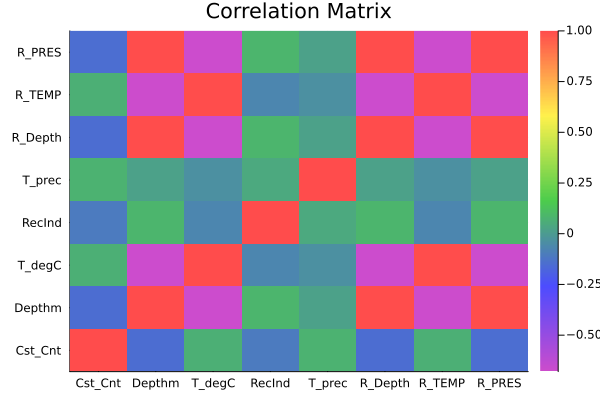

In [67]:
create_heatmap(df4, corr_matrix)

## removeOutliersIQR() : using interquartile range delete all the outliers from the numerical columns

In [68]:
function removeOutliersIQR(dataframe)
    newdf=dataframe
        for col in names(newdf)
            col_values=newdf[!,col]
            colv_sort=sort(col_values)
            Q1=quantile(colv_sort,0.25)
            Q3=quantile(colv_sort,0.75)
            IQR=Q3-Q1
            lim_inf=Q1-1.5*IQR
            lim_sup=Q3+1.5*IQR
            println("$col -> limite inferior: $lim_inf limite superior: $lim_sup")
            filter_vector=(lim_inf .<= col_values) .& (col_values .<= lim_sup) #boolean vector
            newdf = newdf[filter_vector, :]
        end
    return newdf
end

removeOutliersIQR (generic function with 1 method)

In [69]:
df5=removeOutliersIQR(df4)

Cst_Cnt -> limite inferior: -18897.0 limite superior: 53207.0
Depthm -> limite inferior: -325.0 limite superior: 675.0
T_degC -> limite inferior: -0.6899999999999977 limite superior: 22.83
RecInd -> limite inferior: -3.0 limite superior: 13.0
T_prec -> limite inferior: 2.0 limite superior: 2.0
R_Depth -> limite inferior: -252.5 limite superior: 551.5
R_TEMP -> limite inferior: -0.3149999999999995 limite superior: 22.685000000000002
R_PRES -> limite inferior: -266.5 limite superior: 561.5


734419×8 DataFrame
    Row │ Cst_Cnt  Depthm   T_degC   RecInd   T_prec   R_Depth  R_TEMP   R_PRE ⋯
        │ Float64  Float64  Float64  Float64  Float64  Float64  Float64  Float ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │     1.0      8.0   10.46       3.0      2.0      8.0    10.46      8 ⋯
      2 │     1.0     10.0   10.46       7.0      2.0     10.0    10.46     10
      3 │     1.0     19.0   10.45       3.0      2.0     19.0    10.45     19
      4 │     1.0     20.0   10.45       7.0      2.0     20.0    10.45     20
      5 │     1.0     30.0   10.45       7.0      2.0     30.0    10.45     30 ⋯
      6 │     1.0     39.0   10.45       3.0      2.0     39.0    10.45     39
      7 │     1.0     50.0   10.24       7.0      2.0     50.0    10.24     50
      8 │     1.0     58.0   10.06       3.0      2.0     58.0    10.06     58
      9 │     1.0     75.0    9.86       7.0      2.0     75.0     9.86     75 ⋯
     10 │     1.0     78.0    9.83       3.0      2.0     78.0     9.83     78
     11 │     1.0    100.0    9.67       7.0      2.0    100.0     9.67    101
   ⋮    │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮  ⋱
 734410 │ 34403.0    381.0    6.943      3.0      2.0    381.0     6.94    384
 734411 │ 34403.0    400.0    6.694      7.0      2.0    400.0     6.69    403 ⋯
 734412 │ 34403.0    440.0    6.312      3.0      2.0    440.0     6.31    444
 734413 │ 34403.0    500.0    5.993      7.0      2.0    500.0     5.99    504
 734414 │ 34403.0    521.0    5.818      3.0      2.0    521.0     5.82    525
 734415 │ 34404.0      0.0   18.744      7.0      2.0      0.0    18.74      0 ⋯
 734416 │ 34404.0      2.0   18.744      3.0      2.0      2.0    18.74      2
 734417 │ 34404.0      5.0   18.692      3.0      2.0      5.0    18.69      5
 734418 │ 34404.0     10.0   18.161      3.0      2.0     10.0    18.16     10
 734419 │ 34404.0     15.0   17.533      3.0      2.0     15.0    17.53     15 ⋯
                                                1 column and 734398 rows omitted

In [70]:
df5=delete_conscols(df5)

1 columns deleted from df for containing constant values


734419×7 DataFrame
    Row │ Cst_Cnt  Depthm   T_degC   RecInd   R_Depth  R_TEMP   R_PRES  
        │ Float64  Float64  Float64  Float64  Float64  Float64  Float64 
────────┼───────────────────────────────────────────────────────────────
      1 │     1.0      8.0   10.46       3.0      8.0    10.46      8.0
      2 │     1.0     10.0   10.46       7.0     10.0    10.46     10.0
      3 │     1.0     19.0   10.45       3.0     19.0    10.45     19.0
      4 │     1.0     20.0   10.45       7.0     20.0    10.45     20.0
      5 │     1.0     30.0   10.45       7.0     30.0    10.45     30.0
      6 │     1.0     39.0   10.45       3.0     39.0    10.45     39.0
      7 │     1.0     50.0   10.24       7.0     50.0    10.24     50.0
      8 │     1.0     58.0   10.06       3.0     58.0    10.06     58.0
      9 │     1.0     75.0    9.86       7.0     75.0     9.86     75.0
     10 │     1.0     78.0    9.83       3.0     78.0     9.83     78.0
     11 │     1.0    100.0    9.67       7.0    100.0     9.67    101.0
   ⋮    │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮
 734410 │ 34403.0    381.0    6.943      3.0    381.0     6.94    384.0
 734411 │ 34403.0    400.0    6.694      7.0    400.0     6.69    403.0
 734412 │ 34403.0    440.0    6.312      3.0    440.0     6.31    444.0
 734413 │ 34403.0    500.0    5.993      7.0    500.0     5.99    504.0
 734414 │ 34403.0    521.0    5.818      3.0    521.0     5.82    525.0
 734415 │ 34404.0      0.0   18.744      7.0      0.0    18.74      0.0
 734416 │ 34404.0      2.0   18.744      3.0      2.0    18.74      2.0
 734417 │ 34404.0      5.0   18.692      3.0      5.0    18.69      5.0
 734418 │ 34404.0     10.0   18.161      3.0     10.0    18.16     10.0
 734419 │ 34404.0     15.0   17.533      3.0     15.0    17.53     15.0
                                                     734398 rows omitted

## filterColumnsByCorrelation(target,threshold, realtion) : delete all the columns on the basis of given threshold for a target column and relation 

In [83]:
#target is the col name (string) / relation: positive or negative (string) / threshold is a number from 0 to 1 
function filterColumnsByCorrelation(dataframe, target, threshold, relation)
    newdf=dataframe
    for col in names(newdf)
            cor_val = cor(dataframe[!, col], dataframe[!, target])
            col_symbol = Symbol("$col")
        println("$col tiene cor de=$cor_val")
        if relation=="positive" #Both cols grow
            cor_val>=threshold ? "Positive filter accepted" : newdf = select(newdf,Not([col_symbol]))
        elseif relation=="negative" #One col grows the other not
            cor_val<=-threshold ? "Negative filter passed" : newdf = select(newdf,Not([col_symbol]))
        end
    end
    return newdf
end

filterColumnsByCorrelation (generic function with 1 method)

In [84]:
df6=filterColumnsByCorrelation(df5,"Depthm",0.9,"positive")

Cst_Cnt tiene cor de=0.00741450108383288
Depthm tiene cor de=1.0
T_degC tiene cor de=-0.7995341205802323
RecInd tiene cor de=0.050078215306144626
R_Depth tiene cor de=0.9999999857443326
R_TEMP tiene cor de=-0.7995341200038942
R_PRES tiene cor de=0.9999975419906619


734419×3 DataFrame
    Row │ Depthm   R_Depth  R_PRES  
        │ Float64  Float64  Float64 
────────┼───────────────────────────
      1 │     8.0      8.0      8.0
      2 │    10.0     10.0     10.0
      3 │    19.0     19.0     19.0
      4 │    20.0     20.0     20.0
      5 │    30.0     30.0     30.0
      6 │    39.0     39.0     39.0
      7 │    50.0     50.0     50.0
      8 │    58.0     58.0     58.0
      9 │    75.0     75.0     75.0
     10 │    78.0     78.0     78.0
     11 │   100.0    100.0    101.0
   ⋮    │    ⋮        ⋮        ⋮
 734410 │   381.0    381.0    384.0
 734411 │   400.0    400.0    403.0
 734412 │   440.0    440.0    444.0
 734413 │   500.0    500.0    504.0
 734414 │   521.0    521.0    525.0
 734415 │     0.0      0.0      0.0
 734416 │     2.0      2.0      2.0
 734417 │     5.0      5.0      5.0
 734418 │    10.0     10.0     10.0
 734419 │    15.0     15.0     15.0
                 734398 rows omitted

## deleteRow(column): for a given column delete all the null data points.

In [86]:
function deleteRow(dataframe, column)
    return dataframe[.!ismissing.(dataframe[!, column]), :]
end

deleteRow (generic function with 1 method)

In [87]:
deleteRow(df5,"Depthm")

734419×7 DataFrame
    Row │ Cst_Cnt  Depthm   T_degC   RecInd   R_Depth  R_TEMP   R_PRES  
        │ Float64  Float64  Float64  Float64  Float64  Float64  Float64 
────────┼───────────────────────────────────────────────────────────────
      1 │     1.0      8.0   10.46       3.0      8.0    10.46      8.0
      2 │     1.0     10.0   10.46       7.0     10.0    10.46     10.0
      3 │     1.0     19.0   10.45       3.0     19.0    10.45     19.0
      4 │     1.0     20.0   10.45       7.0     20.0    10.45     20.0
      5 │     1.0     30.0   10.45       7.0     30.0    10.45     30.0
      6 │     1.0     39.0   10.45       3.0     39.0    10.45     39.0
      7 │     1.0     50.0   10.24       7.0     50.0    10.24     50.0
      8 │     1.0     58.0   10.06       3.0     58.0    10.06     58.0
      9 │     1.0     75.0    9.86       7.0     75.0     9.86     75.0
     10 │     1.0     78.0    9.83       3.0     78.0     9.83     78.0
     11 │     1.0    100.0    9.67       7.0    100.0     9.67    101.0
   ⋮    │    ⋮        ⋮        ⋮        ⋮        ⋮        ⋮        ⋮
 734410 │ 34403.0    381.0    6.943      3.0    381.0     6.94    384.0
 734411 │ 34403.0    400.0    6.694      7.0    400.0     6.69    403.0
 734412 │ 34403.0    440.0    6.312      3.0    440.0     6.31    444.0
 734413 │ 34403.0    500.0    5.993      7.0    500.0     5.99    504.0
 734414 │ 34403.0    521.0    5.818      3.0    521.0     5.82    525.0
 734415 │ 34404.0      0.0   18.744      7.0      0.0    18.74      0.0
 734416 │ 34404.0      2.0   18.744      3.0      2.0    18.74      2.0
 734417 │ 34404.0      5.0   18.692      3.0      5.0    18.69      5.0
 734418 │ 34404.0     10.0   18.161      3.0     10.0    18.16     10.0
 734419 │ 34404.0     15.0   17.533      3.0     15.0    17.53     15.0
                                                     734398 rows omitted

## describe() : it is used to describe data by giving following for each column

In [85]:
describe(df5)

7×7 DataFrame
 Row │ variable  mean         min      median    max       nmissing  eltype   
     │ Symbol    Float64      Float64  Float64   Float64   Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt   17614.1         1.0   17241.0   34404.0          0  Float64
   2 │ Depthm      160.722       0.0     118.0     551.0          0  Float64
   3 │ T_degC       11.2519      2.23     10.41     22.68         0  Float64
   4 │ RecInd        4.64478     3.0       3.0       7.0          0  Float64
   5 │ R_Depth     160.723       0.0     118.0     551.0          0  Float64
   6 │ R_TEMP       11.2519      2.23     10.41     22.68         0  Float64
   7 │ R_PRES      161.616       0.0     119.0     556.0          0  Float64

# Exercise 2: Regression 

Resulting dataframe from the cleanining: df5
1. Divide the dataset: train & test datasets
2. Get the model with the training set
3. Get the p values
4. Eliminate the variable with highest p value
5. Repeat the process if needed
6. Use the model for prediction
7. Evaluate the model with the RMSE and R² metrics

In [90]:
#1
train, test = splitobs(df5, at = 0.8)

(587535×7 SubDataFrame
    Row │ Cst_Cnt  Depthm   T_degC   RecInd   R_Depth  R_TEMP   R_PRES  
        │ Float64  Float64  Float64  Float64  Float64  Float64  Float64 
────────┼───────────────────────────────────────────────────────────────
      1 │     1.0      8.0    10.46      3.0      8.0    10.46      8.0
      2 │     1.0     10.0    10.46      7.0     10.0    10.46     10.0
      3 │     1.0     19.0    10.45      3.0     19.0    10.45     19.0
      4 │     1.0     20.0    10.45      7.0     20.0    10.45     20.0
      5 │     1.0     30.0    10.45      7.0     30.0    10.45     30.0
      6 │     1.0     39.0    10.45      3.0     39.0    10.45     39.0
      7 │     1.0     50.0    10.24      7.0     50.0    10.24     50.0
      8 │     1.0     58.0    10.06      3.0     58.0    10.06     58.0
      9 │     1.0     75.0     9.86      7.0     75.0     9.86     75.0
     10 │     1.0     78.0     9.83      3.0     78.0     9.83     78.0
     11 │     1.0    100.0     9.67   

In [94]:
#2
model1 = lm(@formula(T_degC ~ Depthm + R_PRES + R_TEMP + Cst_Cnt + RecInd + R_Depth), train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

T_degC ~ 1 + Depthm + R_PRES + R_TEMP + Cst_Cnt + RecInd + R_Depth

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────────────
                    Coef.     Std. Error                   t  Pr(>|t|)      Lower 95%      Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)   2.11944e-12    5.44924e-14               38.89    <1e-99    2.01263e-12    2.22624e-12
Depthm       -1.83671e-11    2.39642e-14             -766.44    <1e-99   -1.84141e-11   -1.83201e-11
R_PRES        1.82435e-11    2.38023e-14              766.46    <1e-99    1.81968e-11    1.82901e-11
R_TEMP        1.0            3.25087e-15  307609957116793.00    <1e-99    1.0            1.0
Cst_Cnt       4.16329e-17 

In [96]:
#3
pval = GLM.coeftable(model1).cols[4][:]

7-element Vector{Float64}:
   0.0
   0.0
   0.0
   0.0
   0.0
   1.163452294269637e-68
 NaN

In [104]:
#4
function removevar(pval,model)
    names_coef=coefnames(model::StatisticalModel)
    remove_var = String[]  
    for i in 1:length(pval)
        if pval[i] > 0.05
            push!(remove_var, names_coef[i])  # If p>0.05 the variable is not representative and must be deleted
        end
    end
    if remove_var==String[]
        println("No col is deleted")
    else
    println("Col(s) to remove: $remove_var") #here we will keep the variables that should be removed
    end
end

removevar (generic function with 1 method)

In [100]:
#4
removevar(pval,model1)

No col is deleted


In [102]:
#5
prediction = predict(model1, test) #vector with calculated predictions for T_degC with the test dataset 

146884-element Vector{Union{Missing, Float64}}:
 14.819999999995021
 13.559999999992261
 12.869999999990808
 12.490000000007237
 12.140000000005866
 11.050000000003958
  9.720000000002335
  9.049999999998784
  8.899999999997492
  8.429999999994376
  7.999999999991193
  7.649999999989082
  7.170000000003145
  ⋮
  7.830000000003478
  7.540000000001129
  6.940000000011875
  6.69000000000921
  6.310000000022741
  5.990000000014997
  5.820000000012664
 18.740000000005512
 18.740000000005548
 18.690000000005174
 18.160000000004484
 17.530000000003785

In [105]:
#6
real_values = test.T_degC
rmseval = sqrt(mean((real_values .- prediction).^2))
ss_total = sum((real_values .- mean(real_values)).^2)
ss_residual = sum((real_values .- prediction).^2)
r2val = 1 - ss_residual / ss_total
println("RMSE: $rmseval")
println("R²: $r2val")

RMSE: 0.0013032403853147061
R²: 0.9999998662917079
